In [1]:
import io
import os
import pandas as pd
import  docx2txt
from docx import Document

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
import win32com.client

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import textract
file_docx = []
file_path = []
source_directory = r'E:\DATA SETS\Resumes'

In [5]:
for file_folder in os.listdir( source_directory):
    #final_path="E:/DATA SETS/Resumes/"+file_folder+".docx"
    final_path = os.path.join( source_directory, file_folder)
    if final_path.endswith('.docx') :
    #for j in os.listdir(os.path.join(r'E:/DATA SETS/Resumes', file_folder)):
        #final_folder_path = os.path.join(final_path,j)
        file_docx.append(textract.process(final_path))
        file_path.append(file_folder)

In [6]:
file_docx

[b'ANIL KUMAR MADDUKURI  \t\t\n\nSQL & MSBI Developer   \n\n\n\n\t\t\n\n\n\nSummary\n\n\n\n2.4 years of experience in MS SQL Server (SSMS) and creating SSIS packages, SSRS Reports by using Microsoft Business Intelligence (MSBI) tools.\n\nExpertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables.\n\nHandled data manipulation and data consistency by creating Views, Triggers, and Synonyms.\n\nHands on experience in creation, optimization and debugging Stored Procedure and Functions.\n\nFamiliar in writing queries using CTE, Temporary Tables and Table Variables.\n\nGood experience in using Set Operators like Union, Union All, Except and Intersect to assist required data.\n\nExperience in manipulate the data from multiple table and report to the client using Aggregate Functions, Windows Functions and String Functions.\n\nWorked extensively on Data Extraction, Transformation and Loading (ETL) process in SQL Server Integration Services.\n\nUsed 

In [7]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [8]:
def cleaned_review(review_df):
    review_df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r","[|]"], value=["","",""], regex=True, inplace=True)
    review_df=review_df.drop(index=[0,1,2,3,4,5,6,7,8,9],axis=0)
    review_df=review_df.reset_index(drop=bool)
    return review_df

In [9]:
df1 = pd.DataFrame(file_docx)

In [10]:
df1

,0
0,b'ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Dev...
1,b'Aradhana Tripathi\n\n\n\nCurrent Location: G...
2,"b""BUDDHA VAMSI ..."
3,b'Chinna Subbarayudu M\n\nDOB: 06th March 1994...
4,b'Name : Gopi Krishna Reddy\n\n\t\t ...
...,...
73,"b""C O N T A C T :\n\n\n\nAddress: Manyata Tech..."
74,b'Srikanth (WORKDAY hCM Consultant)\t ...
75,b'WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\...
76,b'Vinay kumar .v\nWorkday Functional Consultan...


In [11]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text



In [12]:
# Apply to the DF series
df1['new_column'] = df1.apply(remove_punctuations)

In [13]:
df1['Text'] = df1.new_column.str.decode("UTF-8") 

In [14]:
df1

,0,new_column,Text
0,b'ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Dev...,b'ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Dev...,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...
1,b'Aradhana Tripathi\n\n\n\nCurrent Location: G...,b'Aradhana Tripathi\n\n\n\nCurrent Location: G...,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...
2,"b""BUDDHA VAMSI ...","b""BUDDHA VAMSI ...",BUDDHA VAMSI ...
3,b'Chinna Subbarayudu M\n\nDOB: 06th March 1994...,b'Chinna Subbarayudu M\n\nDOB: 06th March 1994...,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...
4,b'Name : Gopi Krishna Reddy\n\n\t\t ...,b'Name : Gopi Krishna Reddy\n\n\t\t ...,Name : Gopi Krishna Reddy\n\n\t\t ...
...,...,...,...
73,"b""C O N T A C T :\n\n\n\nAddress: Manyata Tech...","b""C O N T A C T :\n\n\n\nAddress: Manyata Tech...",C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
74,b'Srikanth (WORKDAY hCM Consultant)\t ...,b'Srikanth (WORKDAY hCM Consultant)\t ...,Srikanth (WORKDAY hCM Consultant)\t ...
75,b'WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\...,b'WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\...,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
76,b'Vinay kumar .v\nWorkday Functional Consultan...,b'Vinay kumar .v\nWorkday Functional Consultan...,Vinay kumar .v\nWorkday Functional Consultant\...


In [15]:
cleanreviewdf1=cleaned_review(df1)

In [16]:
cleanreviewdf1

,0,new_column,Text
0,b'Mooraboyina Guravaiah\n\nWorkday Integration...,b'Mooraboyina Guravaiah\n\nWorkday Integration...,Mooraboyina GuravaiahWorkday Integration Speci...
1,b'Resume\n\nName : Neeraj Mishra\n\n\n\nE...,b'Resume\n\nName : Neeraj Mishra\n\n\n\nE...,ResumeName : Neeraj MishraExperience Summ...
2,"b""Harikrishna Akula ...","b""Harikrishna Akula ...",Harikrishna Akula ...
3,"b""PEOPLESOFT Administrator\n\n\n\n\n\nSRINIVAS...","b""PEOPLESOFT Administrator\n\n\n\n\n\nSRINIVAS...",PEOPLESOFT AdministratorSRINIVAS.K Experience ...
4,b'Vinod Akkala ...,b'Vinod Akkala ...,Vinod Akkala ...
...,...,...,...
63,"b""C O N T A C T :\n\n\n\nAddress: Manyata Tech...","b""C O N T A C T :\n\n\n\nAddress: Manyata Tech...","C O N T A C T :Address: Manyata Tech Park,Naga..."
64,b'Srikanth (WORKDAY hCM Consultant)\t ...,b'Srikanth (WORKDAY hCM Consultant)\t ...,Srikanth (WORKDAY hCM Consultant) ...
65,b'WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\...,b'WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\...,WORKDAY HCM FCMName : Kumar S.SRole : Workda...
66,b'Vinay kumar .v\nWorkday Functional Consultan...,b'Vinay kumar .v\nWorkday Functional Consultan...,Vinay kumar .vWorkday Functional ConsultantEXP...


In [17]:
df1.Text.drop_duplicates()

0     ANIL KUMAR MADDUKURI  SQL & MSBI Developer   S...
1     Aradhana TripathiCurrent Location: Gachibowli,...
2     BUDDHA VAMSI                                  ...
3     Chinna Subbarayudu MDOB: 06th March 1994Nation...
4     Name         : Gopi Krishna Reddy             ...
                            ...                        
73    C O N T A C T :Address: Manyata Tech Park,Naga...
74    Srikanth (WORKDAY hCM Consultant)             ...
75    WORKDAY  HCM  FCMName : Kumar S.SRole : Workda...
76    Vinay kumar .vWorkday Functional ConsultantEXP...
77    SQL AND MSBI DEVELOPERSQL AND MSBI DEVELOPERB....
Name: Text, Length: 76, dtype: object

In [18]:
df1

,0,new_column,Text
0,b'ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Dev...,b'ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Dev...,ANIL KUMAR MADDUKURI SQL & MSBI Developer S...
1,b'Aradhana Tripathi\n\n\n\nCurrent Location: G...,b'Aradhana Tripathi\n\n\n\nCurrent Location: G...,"Aradhana TripathiCurrent Location: Gachibowli,..."
2,"b""BUDDHA VAMSI ...","b""BUDDHA VAMSI ...",BUDDHA VAMSI ...
3,b'Chinna Subbarayudu M\n\nDOB: 06th March 1994...,b'Chinna Subbarayudu M\n\nDOB: 06th March 1994...,Chinna Subbarayudu MDOB: 06th March 1994Nation...
4,b'Name : Gopi Krishna Reddy\n\n\t\t ...,b'Name : Gopi Krishna Reddy\n\n\t\t ...,Name : Gopi Krishna Reddy ...
...,...,...,...
73,"b""C O N T A C T :\n\n\n\nAddress: Manyata Tech...","b""C O N T A C T :\n\n\n\nAddress: Manyata Tech...","C O N T A C T :Address: Manyata Tech Park,Naga..."
74,b'Srikanth (WORKDAY hCM Consultant)\t ...,b'Srikanth (WORKDAY hCM Consultant)\t ...,Srikanth (WORKDAY hCM Consultant) ...
75,b'WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\...,b'WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\...,WORKDAY HCM FCMName : Kumar S.SRole : Workda...
76,b'Vinay kumar .v\nWorkday Functional Consultan...,b'Vinay kumar .v\nWorkday Functional Consultan...,Vinay kumar .vWorkday Functional ConsultantEXP...


In [19]:
# UTF - 8 #ÐÏà¡±á > þÿ  ...
# latin = ÃÃÃ Â¡Â±Ã¡ > Ã¾Ã¿
cleaned_df = df1.Text.apply(clean)

In [20]:
data = pd.concat([df1,cleaned_df],axis = 1)

In [21]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['cleaned'] = cleaned_df.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [22]:
data

,0,new_column,Text,Text,cleaned
0,b'ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Dev...,b'ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Dev...,ANIL KUMAR MADDUKURI SQL & MSBI Developer S...,anil kumar maddukuri sql msbi developer y...,anil kumar maddukuri sql msbi developer years ...
1,b'Aradhana Tripathi\n\n\n\nCurrent Location: G...,b'Aradhana Tripathi\n\n\n\nCurrent Location: G...,"Aradhana TripathiCurrent Location: Gachibowli,...",aradhana tripathicurrent location gachibowli h...,aradhana tripathicurrent location gachibowli h...
2,"b""BUDDHA VAMSI ...","b""BUDDHA VAMSI ...",BUDDHA VAMSI ...,buddha vamsi ...,buddha vamsi career objectivehave years experi...
3,b'Chinna Subbarayudu M\n\nDOB: 06th March 1994...,b'Chinna Subbarayudu M\n\nDOB: 06th March 1994...,Chinna Subbarayudu MDOB: 06th March 1994Nation...,chinna subbarayudu mdob march indianprofile ...,chinna subbarayudu mdob march indianprofile su...
4,b'Name : Gopi Krishna Reddy\n\n\t\t ...,b'Name : Gopi Krishna Reddy\n\n\t\t ...,Name : Gopi Krishna Reddy ...,name gopi krishna reddy ...,name gopi krishna reddy professional summerywo...
...,...,...,...,...,...
73,"b""C O N T A C T :\n\n\n\nAddress: Manyata Tech...","b""C O N T A C T :\n\n\n\nAddress: Manyata Tech...","C O N T A C T :Address: Manyata Tech Park,Naga...",c o n t a c t address manyata tech parknagavar...,c n c address manyata tech parknagavara bangal...
74,b'Srikanth (WORKDAY hCM Consultant)\t ...,b'Srikanth (WORKDAY hCM Consultant)\t ...,Srikanth (WORKDAY hCM Consultant) ...,srikanth workday hcm consultant ...,srikanth workday hcm consultant seeking suitab...
75,b'WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\...,b'WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\...,WORKDAY HCM FCMName : Kumar S.SRole : Workda...,workday hcm fcmname kumar ssrole workday c...,workday hcm fcmname kumar ssrole workday consu...
76,b'Vinay kumar .v\nWorkday Functional Consultan...,b'Vinay kumar .v\nWorkday Functional Consultan...,Vinay kumar .vWorkday Functional ConsultantEXP...,vinay kumar vworkday functional consultantexpe...,vinay kumar vworkday functional consultantexpe...


In [23]:
freq = pd.Series(' '.join(cleaned_df).split()).value_counts()[:20] # for top 20
freq

and            2868
the            1400
in             1301
to             1115
of             1052
for             682
on              647
with            431
as              408
using           385
application     370
workday         357
peoplesoft      356
a               327
from            320
experience      309
server          308
data            307
reports         283
business        265
dtype: int64

In [24]:
df = data['cleaned'].copy()
df = pd.DataFrame(df)

In [25]:
df['token'] = ''
j=0
for i in cleaned_df:
    df.token[j]=i.split()
    j = j+1
f = cleaned_df[0].split()

In [26]:
import pprint
from spacy.matcher import Matcher
import multiprocessing as mp

In [27]:
df


,cleaned,token
0,anil kumar maddukuri sql msbi developer years ...,"[anil, kumar, maddukuri, sql, msbi, developer,..."
1,aradhana tripathicurrent location gachibowli h...,"[aradhana, tripathicurrent, location, gachibow..."
2,buddha vamsi career objectivehave years experi...,"[buddha, vamsi, career, objectivehave, years, ..."
3,chinna subbarayudu mdob march indianprofile su...,"[chinna, subbarayudu, mdob, march, indianprofi..."
4,name gopi krishna reddy professional summerywo...,"[name, gopi, krishna, reddy, professional, sum..."
...,...,...
73,c n c address manyata tech parknagavara bangal...,"[c, o, n, t, a, c, t, address, manyata, tech, ..."
74,srikanth workday hcm consultant seeking suitab...,"[srikanth, workday, hcm, consultant, seeking, ..."
75,workday hcm fcmname kumar ssrole workday consu...,"[workday, hcm, fcmname, kumar, ssrole, workday..."
76,vinay kumar vworkday functional consultantexpe...,"[vinay, kumar, vworkday, functional, consultan..."


In [28]:
def extract_skills(nlp_text):
    '''
    Helper function to extract skills from spacy nlp text
    :param nlp_text: object of `spacy.tokens.doc.Doc`
    :param noun_chunks: noun chunks extracted from nlp text
    :return: list of skills extracted
    '''
    tokens = nlp_text
    data = pd.read_csv('E:\DATA SETS\Resumes\Skill.csv')
    skills = list(data.columns.values)
    skillset = []
    # check for one-grams
    for token in tokens:
        if token.lower() in skills:
            skillset.append(token)
    return np.unique(skillset)
    # check for bi-grams and tri-grams
    

In [29]:
df['skills'] = ''
j = 0
for i in df.token:
    df['skills'][j] = extract_skills(df.token[j])
    j = j+1

In [30]:
df

,cleaned,token,skills
0,anil kumar maddukuri sql msbi developer years ...,"[anil, kumar, maddukuri, sql, msbi, developer,...","[database, debugging, design, engineering, etl..."
1,aradhana tripathicurrent location gachibowli h...,"[aradhana, tripathicurrent, location, gachibow...","[acquisition, analysis, analytical, analytics,..."
2,buddha vamsi career objectivehave years experi...,"[buddha, vamsi, career, objectivehave, years, ...","[architecture, cloud, database, engineering, e..."
3,chinna subbarayudu mdob march indianprofile su...,"[chinna, subbarayudu, mdob, march, indianprofi...","[analysis, analytics, database, design, erp, e..."
4,name gopi krishna reddy professional summerywo...,"[name, gopi, krishna, reddy, professional, sum...","[analysis, analytics, cloud, communication, de..."
...,...,...,...
73,c n c address manyata tech parknagavara bangal...,"[c, o, n, t, a, c, t, address, manyata, tech, ...","[agile, c, certification, electronics, expense..."
74,srikanth workday hcm consultant seeking suitab...,"[srikanth, workday, hcm, consultant, seeking, ...","[access, analytical, communication, erp, hris,..."
75,workday hcm fcmname kumar ssrole workday consu...,"[workday, hcm, fcmname, kumar, ssrole, workday...","[access, audit, billing, communication, design..."
76,vinay kumar vworkday functional consultantexpe...,"[vinay, kumar, vworkday, functional, consultan...","[administration, communication, design, engine..."


In [31]:
def extract_post(nlp_text):
    '''
    Helper function to extract skills from spacy nlp text
    :param nlp_text: object of `spacy.tokens.doc.Doc`
    :param noun_chunks: noun chunks extracted from nlp text
    :return: list of skills extracted
    '''
    tokens = nlp_text
    data = pd.read_csv('E:\DATA SETS\Resumes\post.csv')
    skills = list(data.columns.values)
    skillset = []
    # check for one-grams
    for token in tokens:
        if token.lower() in skills:
            skillset.append(token)
    return np.unique(skillset)
    # check for bi-grams and tri-grams

In [32]:
df['post'] = ''
j = 0
for i in df.token:
    df['post'][j] = extract_post(df.token[j])
    j = j+1

In [33]:
df

,cleaned,token,skills,post
0,anil kumar maddukuri sql msbi developer years ...,"[anil, kumar, maddukuri, sql, msbi, developer,...","[database, debugging, design, engineering, etl...","[developer, integration, software, sql]"
1,aradhana tripathicurrent location gachibowli h...,"[aradhana, tripathicurrent, location, gachibow...","[acquisition, analysis, analytical, analytics,...","[consultant, developer, development, sql]"
2,buddha vamsi career objectivehave years experi...,"[buddha, vamsi, career, objectivehave, years, ...","[architecture, cloud, database, engineering, e...","[developer, development, integration, oracle, ..."
3,chinna subbarayudu mdob march indianprofile su...,"[chinna, subbarayudu, mdob, march, indianprofi...","[analysis, analytics, database, design, erp, e...","[consultant, developer, development, hcm, inte..."
4,name gopi krishna reddy professional summerywo...,"[name, gopi, krishna, reddy, professional, sum...","[analysis, analytics, cloud, communication, de...","[consultant, development, hcm, hr, integration..."
...,...,...,...,...
73,c n c address manyata tech parknagavara bangal...,"[c, o, n, t, a, c, t, address, manyata, tech, ...","[agile, c, certification, electronics, expense...","[development, peoplesoft, software, sql]"
74,srikanth workday hcm consultant seeking suitab...,"[srikanth, workday, hcm, consultant, seeking, ...","[access, analytical, communication, erp, hris,...","[consultant, development, hcm, integration, so..."
75,workday hcm fcmname kumar ssrole workday consu...,"[workday, hcm, fcmname, kumar, ssrole, workday...","[access, audit, billing, communication, design...","[consultant, development, hcm, integration, pe..."
76,vinay kumar vworkday functional consultantexpe...,"[vinay, kumar, vworkday, functional, consultan...","[administration, communication, design, engine...","[consultant, development, hcm, integration, pe..."


In [34]:
def contactDetails(Text):
    name = ''  
    for i in range(0,3):
        name = " ".join([name, Text[i]])
    return(name)

In [35]:
df['name'] = ''
j = 0
for i in df.token:
    df['name'][j] = contactDetails(df.token[j])
    j = j+1

In [36]:
df

,cleaned,token,skills,post,name
0,anil kumar maddukuri sql msbi developer years ...,"[anil, kumar, maddukuri, sql, msbi, developer,...","[database, debugging, design, engineering, etl...","[developer, integration, software, sql]",anil kumar maddukuri
1,aradhana tripathicurrent location gachibowli h...,"[aradhana, tripathicurrent, location, gachibow...","[acquisition, analysis, analytical, analytics,...","[consultant, developer, development, sql]",aradhana tripathicurrent location
2,buddha vamsi career objectivehave years experi...,"[buddha, vamsi, career, objectivehave, years, ...","[architecture, cloud, database, engineering, e...","[developer, development, integration, oracle, ...",buddha vamsi career
3,chinna subbarayudu mdob march indianprofile su...,"[chinna, subbarayudu, mdob, march, indianprofi...","[analysis, analytics, database, design, erp, e...","[consultant, developer, development, hcm, inte...",chinna subbarayudu mdob
4,name gopi krishna reddy professional summerywo...,"[name, gopi, krishna, reddy, professional, sum...","[analysis, analytics, cloud, communication, de...","[consultant, development, hcm, hr, integration...",name gopi krishna
...,...,...,...,...,...
73,c n c address manyata tech parknagavara bangal...,"[c, o, n, t, a, c, t, address, manyata, tech, ...","[agile, c, certification, electronics, expense...","[development, peoplesoft, software, sql]",c o n
74,srikanth workday hcm consultant seeking suitab...,"[srikanth, workday, hcm, consultant, seeking, ...","[access, analytical, communication, erp, hris,...","[consultant, development, hcm, integration, so...",srikanth workday hcm
75,workday hcm fcmname kumar ssrole workday consu...,"[workday, hcm, fcmname, kumar, ssrole, workday...","[access, audit, billing, communication, design...","[consultant, development, hcm, integration, pe...",workday hcm fcmname
76,vinay kumar vworkday functional consultantexpe...,"[vinay, kumar, vworkday, functional, consultan...","[administration, communication, design, engine...","[consultant, development, hcm, integration, pe...",vinay kumar vworkday


In [37]:
from nltk.stem import PorterStemmer

In [38]:
resume = df.drop(columns={'cleaned','token'}, axis = 1)

In [39]:
from nltk.stem.wordnet import WordNetLemmatizer
def lem(x):
    lmtzr = WordNetLemmatizer()
    lemmatized = [lmtzr.lemmatize(word) for word in x]
    return lemmatized   




In [40]:
resume['lem'] = ''

In [41]:
j = 0
for i in resume.post:
    resume['lem'][j] = lem(resume.post[j])
    j = j+1

In [42]:
def stem(x):
    ps = PorterStemmer()
    stemming = [ps.stem(word) for word in x]
    return stemming   



In [43]:
resume['stem'] = ''

In [44]:
j = 0
for i in resume.lem:
    resume['stem'][j] = stem(resume.lem[j])
    j = j+1

In [45]:
resume['designation'] =''

In [46]:

def extract_designation(x):
    y =''
    for token in x:
        if 'develop' in x and 'sql' in x and 'oracl' in x:
            y ='SQL and Oracle Developer'
        elif 'consult' in x and 'workday' in x:
            y= ' workday consultant'
        elif 'react' in x and 'develop' in x:
             y ='React  Developer'
        elif 'reactjs' in x and 'develop' in x:
             y ='ReactJS  Developer' 
        elif 'develop' in x and 'sql' in x :
            y ='SQL  Developer'
        elif 'hr' in x:
            y = 'human resource'
        elif 'peoplesoft'in x and 'admin' in x:
            y = 'PeopleSoft Admin'
        elif 'peoplesoft' in x and 'consult' in x:
            y ='PeopleSoft Consultant'
        elif token =='softwar':
             y ='Software Engineer'
        elif 'develop' in x and 'sql' in x :
            y ='SQL  Developer' 
        else:
            y ='intern'
    return y
            

In [47]:
j = 0
for i in resume.post:
    resume['designation'][j] = extract_designation(resume.stem[j])
    j = j+1

In [48]:
resume.head(25)

,skills,post,name,lem,stem,designation
0,"[database, debugging, design, engineering, etl...","[developer, integration, software, sql]",anil kumar maddukuri,"[developer, integration, software, sql]","[develop, integr, softwar, sql]",SQL Developer
1,"[acquisition, analysis, analytical, analytics,...","[consultant, developer, development, sql]",aradhana tripathicurrent location,"[consultant, developer, development, sql]","[consult, develop, develop, sql]",SQL Developer
2,"[architecture, cloud, database, engineering, e...","[developer, development, integration, oracle, ...",buddha vamsi career,"[developer, development, integration, oracle, ...","[develop, develop, integr, oracl, softwar, sql]",SQL and Oracle Developer
3,"[analysis, analytics, database, design, erp, e...","[consultant, developer, development, hcm, inte...",chinna subbarayudu mdob,"[consultant, developer, development, hcm, inte...","[consult, develop, develop, hcm, integr, peopl...",workday consultant
4,"[analysis, analytics, cloud, communication, de...","[consultant, development, hcm, hr, integration...",name gopi krishna,"[consultant, development, hcm, hr, integration...","[consult, develop, hcm, hr, integr, softwar, w...",workday consultant
5,"[api, communication, english, erp, html, logis...","[consultant, development, hcm, integration, so...",g himaja career,"[consultant, development, hcm, integration, so...","[consult, develop, hcm, integr, softwar, workday]",workday consultant
6,"[agile, english, java, p, plan, queries, scrum...","[integration, software, sql]",name ravali p,"[integration, software, sql]","[integr, softwar, sql]",intern
7,"[administration, algorithms, android, api, c, ...",[sql],susovan bag seeking,[sql],[sql],intern
8,"[analysis, communication, engineering, policie...","[consultant, hcm, hr, workday]",jyoti vermaprofessional summaryprofessional,"[consultant, hcm, hr, workday]","[consult, hcm, hr, workday]",workday consultant
9,"[access, accounting, analysis, analytical, com...","[development, integration, software, sql, ui]",kamballa pradeep synopsislooking,"[development, integration, software, sql, ui]","[develop, integr, softwar, sql, ui]",SQL Developer


In [49]:
from nltk.stem.wordnet import WordNetLemmatizer

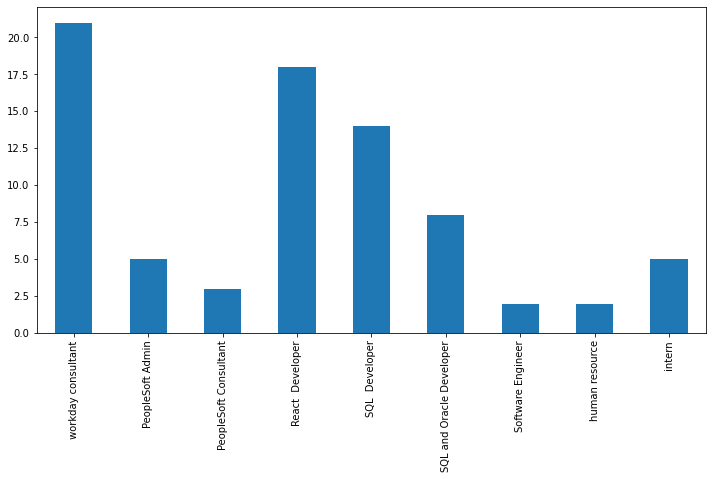

<Figure size 432x288 with 0 Axes>

In [112]:
resume['designation'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()
plt.savefig('my_plot.png')

In [51]:
data = resume[['skills','designation']]

In [52]:
d = data.designation.copy()

In [53]:
data

,skills,designation
0,"[database, debugging, design, engineering, etl...",SQL Developer
1,"[acquisition, analysis, analytical, analytics,...",SQL Developer
2,"[architecture, cloud, database, engineering, e...",SQL and Oracle Developer
3,"[analysis, analytics, database, design, erp, e...",workday consultant
4,"[analysis, analytics, cloud, communication, de...",workday consultant
...,...,...
73,"[agile, c, certification, electronics, expense...",SQL Developer
74,"[access, analytical, communication, erp, hris,...",workday consultant
75,"[access, audit, billing, communication, design...",workday consultant
76,"[administration, communication, design, engine...",workday consultant


In [54]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['designation']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [55]:
data.designation.value_counts()

0    21
3    18
4    14
5     8
8     5
1     5
2     3
6     2
7     2
Name: designation, dtype: int64

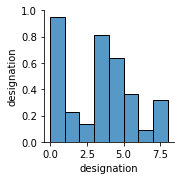

In [56]:
import seaborn as sns
sns.pairplot(data = data)

In [57]:
#0- workday consultant
#1 - Peoplesoft admin
#2 - Peoplesoft Consultant
#3 - React Developer
#4 - SQL Developer
#5 - SQl and Oracle Developer
#6 - Software Engineer
#7 - Human Resourse
#8 - Intern

<AxesSubplot:xlabel='count', ylabel='designation'>

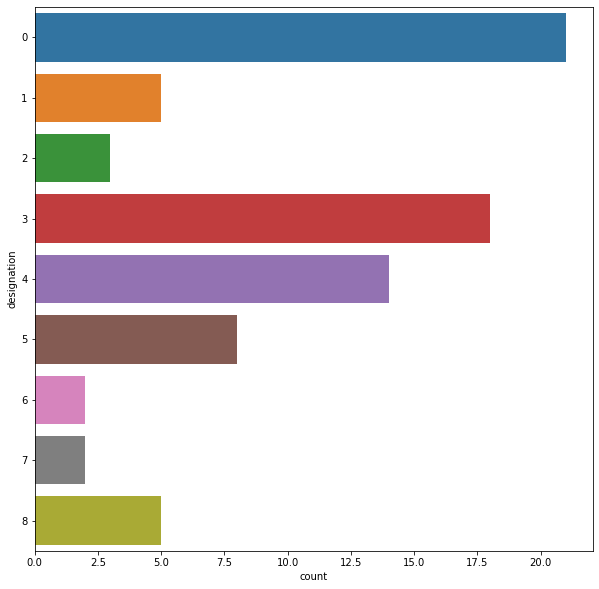

In [58]:
plt.figure(figsize=(10,10))
plt.xticks()
sns.countplot(y="designation", data=data)

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [60]:

from sklearn.feature_extraction.text import CountVectorizer
requiredText = data['skills'].apply(lambda x: " ".join(x))
requiredTarget = data['designation'].values
p = requiredText.values  

In [61]:
p

array(['database debugging design engineering etl excel health matrix process queries reporting reports sql system visual windows writing',
       'acquisition analysis analytical analytics aws cloud database design ecommerce excel hadoop hive migration mysql queries r retail sales sas sql system tableau technical testing transactions writing',
       'architecture cloud database engineering english etl ibm oracle sql writing',
       'analysis analytics database design erp etl excel matrix payroll peoplesoft plan policies process prototyping queries reporting reports requests rest security shell soap sql strategy system technical testing writing xml',
       'analysis analytics cloud communication design english excel payroll presentation reporting reports requests security soap specifications system technical testing troubleshooting writing xml',
       'api communication english erp html logistics payments payroll process recruitment reporting reports schedule soap sourcing testing 

In [62]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(p)
WordFeatures = word_vectorizer.transform(p)

print ("Feature completed .....")

Feature completed .....


In [63]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=30, test_size=0.20, shuffle = True, stratify=requiredTarget)
X_train.shape, X_test.shape

((62, 194), (16, 194))

In [67]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
prediction_1 = rf_clf.predict(X_test)
print('Accuracy of Decision Tree Classifier on training set: {:.4f}'.format(rf_clf.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on test set    : {:.4f}'.format(rf_clf.score(X_test, y_test)))

Accuracy of Decision Tree Classifier on training set: 1.0000
Accuracy of Decision Tree Classifier on test set    : 0.7500


In [68]:
import os,re
import docx2txt
import textract
import pandas as pd
import numpy as np
from docx import Document
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
nltk.download("stopwords")
import xgboost as xgb

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Win-10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Win-10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
print("\n Classification report for Decision Tree Classifier %s:\n%s\n" % (rf_clf, metrics.classification_report(y_test, prediction_1)))


 Classification report for Decision Tree Classifier RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      0.50      0.67         2
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1

    accuracy                           0.75        16
   macro avg       0.47      0.44      0.44        16
weighted avg       0.76      0.75      0.74        16




In [70]:
accuracy_1 = round(accuracy_score(y_test,prediction_1),4)
precision_1 = round(precision_score(y_test,prediction_1,average = 'macro'),4)
recall_1 = round(recall_score(y_test,prediction_1, average = 'macro'),4)
f1_1 = round(f1_score(y_test,prediction_1, average = 'macro'),4)

In [71]:
print('Accuracy Score   : ', accuracy_1)
print('Precision Score  : ', precision_1)
print('Recall Score     : ', recall_1)
print('f1-Score         : ', f1_1)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_1))

Accuracy Score   :  0.75
Precision Score  :  0.475
Recall Score     :  0.4375
f1-Score         :  0.4444
Confusion Matrix :
 [[4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0]
 [0 0 0 0 3 0 0 0]
 [0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]]


In [72]:
sv_clf = SVC()
sv_clf.fit(X_train, y_train)
prediction_2 = sv_clf.predict(X_test)
print('Accuracy of Support Vector Classifier on training set: {:.4f}'.format(sv_clf.score(X_train, y_train)))
print('Accuracy of Support Vector Classifier on test set    : {:.4f}'.format(sv_clf.score(X_test, y_test)))

Accuracy of Support Vector Classifier on training set: 0.8871
Accuracy of Support Vector Classifier on test set    : 0.8125


In [73]:
print("\n Classification report for Support Vector Classifier %s:\n%s\n" % (sv_clf, metrics.classification_report(y_test, prediction_2)))


 Classification report for Support Vector Classifier SVC():
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       0.50      1.00      0.67         2
           8       0.00      0.00      0.00         1

    accuracy                           0.81        16
   macro avg       0.47      0.57      0.51        16
weighted avg       0.70      0.81      0.74        16




In [74]:
accuracy_2 = round(accuracy_score(y_test,prediction_2),4)
precision_2 = round(precision_score(y_test,prediction_2,average = 'macro'),4)
recall_2 = round(recall_score(y_test,prediction_2, average = 'macro'),4)
f1_2 = round(f1_score(y_test,prediction_2, average = 'macro'),4)

In [75]:
print('Accuracy Score   : ', accuracy_2)
print('Precision Score  : ', precision_2)
print('Recall Score     : ', recall_2)
print('f1-Score         : ', f1_2)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_2))

Accuracy Score   :  0.8125
Precision Score  :  0.4714
Recall Score     :  0.5714
f1-Score         :  0.5079
Confusion Matrix :
 [[4 0 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0]
 [0 0 0 4 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 1 0]]


In [76]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
prediction_3 = nb_clf.predict(X_test)
print('Accuracy of Multinomial NB Classifier on training set: {:.4f}'.format(nb_clf.score(X_train, y_train)))
print('Accuracy of Multinomial NB Classifier on test set    : {:.4f}'.format(nb_clf.score(X_test, y_test)))

Accuracy of Multinomial NB Classifier on training set: 0.6774
Accuracy of Multinomial NB Classifier on test set    : 0.6250


In [77]:
print("\n Classification report for Multinomial NB Classifier %s:\n%s\n" % (nb_clf, metrics.classification_report(y_test, prediction_3)))


 Classification report for Multinomial NB Classifier MultinomialNB():
              precision    recall  f1-score   support

           0       0.40      1.00      0.57         4
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       1.00      0.67      0.80         3
           5       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1

    accuracy                           0.62        16
   macro avg       0.34      0.38      0.34        16
weighted avg       0.54      0.62      0.54        16




In [78]:
accuracy_3 = round(accuracy_score(y_test,prediction_3),4)
precision_3 = round(precision_score(y_test,prediction_3,average = 'macro'),4)
recall_3 = round(recall_score(y_test,prediction_3, average = 'macro'),4)
f1_3 = round(f1_score(y_test,prediction_3, average = 'macro'),4)

In [79]:
print('Accuracy Score  : ', accuracy_3)
print('Precision Score : ', precision_3)
print('Recall Score    : ', recall_3)
print('f1-Score        : ', f1_3)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_3))

Accuracy Score  :  0.625
Precision Score :  0.3429
Recall Score    :  0.381
f1-Score        :  0.3388
Confusion Matrix:
 [[4 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 4 0 0 0]
 [1 0 0 0 2 0 0]
 [2 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]]


In [80]:
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)
prediction_4 = logistic_clf.predict(X_test)
print('Accuracy of Logistic Regression Classifier on training set: {:.4f}'.format(logistic_clf.score(X_train, y_train)))
print('Accuracy of Logistic Regression Classifier on test set    : {:.4f}'.format(logistic_clf.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on training set: 0.7903
Accuracy of Logistic Regression Classifier on test set    : 0.7500


In [81]:
print("\n Classification report for Logistic Regression Classifier %s:\n%s\n" % (logistic_clf, metrics.classification_report(y_test, prediction_4)))


 Classification report for Logistic Regression Classifier LogisticRegression():
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       0.50      0.50      0.50         2
           8       0.00      0.00      0.00         1

    accuracy                           0.75        16
   macro avg       0.44      0.50      0.46        16
weighted avg       0.64      0.75      0.68        16




In [82]:
accuracy_4 = round(accuracy_score(y_test,prediction_4),4)
precision_4 = round(precision_score(y_test,prediction_4,average = 'macro'),4)
recall_4 = round(recall_score(y_test,prediction_4, average = 'macro'),4)
f1_4 = round(f1_score(y_test,prediction_4, average = 'macro'),4)

In [83]:
print('Accuracy Score  : ', accuracy_4)
print('Precision Score : ', precision_4)
print('Recall Score    : ', recall_4)
print('f1-Score        : ', f1_4)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_4))

Accuracy Score  :  0.75
Precision Score :  0.4388
Recall Score    :  0.5
f1-Score        :  0.461
Confusion Matrix:
 [[4 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 4 0 0 0]
 [0 0 0 0 3 0 0]
 [1 0 0 0 0 1 0]
 [0 0 0 0 0 1 0]]


In [84]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)
prediction_5 = ab_clf.predict(X_test)
print('Accuracy of AdaBoost Classifier on training set: {:.4f}'.format(ab_clf.score(X_train, y_train)))
print('Accuracy of AdaBoost Classifier on test set    : {:.4f}'.format(ab_clf.score(X_test, y_test)))

Accuracy of AdaBoost Classifier on training set: 0.5645
Accuracy of AdaBoost Classifier on test set    : 0.5000


In [85]:

print("\n Classification report for AdaBoost Classifier %s:\n%s\n" % (ab_clf, metrics.classification_report(y_test, prediction_5)))


 Classification report for AdaBoost Classifier AdaBoostClassifier():
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         4
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1

    accuracy                           0.50        16
   macro avg       0.19      0.29      0.21        16
weighted avg       0.33      0.50      0.38        16




In [86]:
accuracy_5 = round(accuracy_score(y_test,prediction_5),4)
precision_5 = round(precision_score(y_test,prediction_5,average = 'macro'),4)
recall_5 = round(recall_score(y_test,prediction_5, average = 'macro'),4)
f1_5 = round(f1_score(y_test,prediction_5, average = 'macro'),4)

In [87]:
print('Accuracy Score  : ', accuracy_5)
print('Precision Score : ', precision_5)
print('Recall Score    : ', recall_5)
print('f1-Score        : ', f1_5)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_5))

Accuracy Score  :  0.5
Precision Score :  0.1905
Recall Score    :  0.2857
f1-Score        :  0.2143
Confusion Matrix:
 [[4 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 4 0 0 0]
 [3 0 0 0 0 0 0]
 [2 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]]


In [88]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
prediction_6 = gb_clf.predict(X_test)
print('Accuracy of GradientBoosting Classifier on training set: {:.4f}'.format(gb_clf.score(X_train, y_train)))
print('Accuracy of GradientBoosting Classifier on test set    : {:.4f}'.format(gb_clf.score(X_test, y_test)))

Accuracy of GradientBoosting Classifier on training set: 1.0000
Accuracy of GradientBoosting Classifier on test set    : 0.8125


In [89]:
print("\n Classification report for GradientBoosting Classifier %s:\n%s\n" % (gb_clf, metrics.classification_report(y_test, prediction_6)))


 Classification report for GradientBoosting Classifier GradientBoostingClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       0.75      1.00      0.86         3
           5       0.67      1.00      0.80         2
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1

    accuracy                           0.81        16
   macro avg       0.43      0.50      0.46        16
weighted avg       0.72      0.81      0.76        16




In [90]:
accuracy_6 = round(accuracy_score(y_test,prediction_6),4)
precision_6 = round(precision_score(y_test,prediction_6,average = 'macro'),4)
recall_6 = round(recall_score(y_test,prediction_6, average = 'macro'),4)
f1_6 = round(f1_score(y_test,prediction_6, average = 'macro'),4)

In [91]:
print('Accuracy Score  : ', accuracy_6)
print('Precision Score : ', precision_6)
print('Recall Score    : ', recall_6)
print('f1-Score        : ', f1_6)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_6))

Accuracy Score  :  0.8125
Precision Score :  0.4271
Recall Score    :  0.5
f1-Score        :  0.4571
Confusion Matrix:
 [[4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 4 0 0 0 0]
 [0 0 0 0 3 0 0 0]
 [0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]]


In [92]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [93]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
prediction_7 = xgb_clf.predict(X_test)
print('Accuracy of XtremeGradientBoosting Classifier on training set: {:.4f}'.format(xgb_clf.score(X_train, y_train)))
print('Accuracy of XtremeGradientBoosting Classifier on test set    : {:.4f}'.format(xgb_clf.score(X_test, y_test)))

Accuracy of XtremeGradientBoosting Classifier on training set: 1.0000
Accuracy of XtremeGradientBoosting Classifier on test set    : 0.9375


In [94]:
print("\n Classification report for XtremeGradientBoosting Classifier %s:\n%s\n" % (xgb_clf, metrics.classification_report(y_test, prediction_7)))


 Classification report for XtremeGradientBoosting Classifier XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
       

In [95]:
accuracy_7 = round(accuracy_score(y_test,prediction_7),4)
precision_7 = round(precision_score(y_test,prediction_7,average = 'macro'),4)
recall_7 = round(recall_score(y_test,prediction_7, average = 'macro'),4)
f1_7 = round(f1_score(y_test,prediction_7, average = 'macro'),4)

In [96]:
print('Accuracy Score  : ', accuracy_7)
print('Precision Score : ', precision_7)
print('Recall Score    : ', recall_7)
print('f1-Score        : ', f1_7)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_7))

Accuracy Score  :  0.9375
Precision Score :  0.8095
Recall Score    :  0.8571
f1-Score        :  0.8286
Confusion Matrix:
 [[4 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 4 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 1 0]]


In [97]:
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)
prediction_8 = lgb_clf.predict(X_test)
print('Accuracy of LightGradientBoosting Classifier on training set: {:.4f}'.format(lgb_clf.score(X_train, y_train)))
print('Accuracy of LightGradientBoosting Classifier on test set    : {:.4f}'.format(lgb_clf.score(X_test, y_test)))

Accuracy of LightGradientBoosting Classifier on training set: 1.0000
Accuracy of LightGradientBoosting Classifier on test set    : 0.7500


In [98]:
print("\n Classification report for LightGradientBoosting Classifier %s:\n%s\n" % (lgb_clf, metrics.classification_report(y_test, prediction_8)))


 Classification report for LightGradientBoosting Classifier LGBMClassifier():
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       1.00      0.67      0.80         3
           5       0.50      1.00      0.67         2
           8       0.00      0.00      0.00         1

    accuracy                           0.75        16
   macro avg       0.45      0.52      0.47        16
weighted avg       0.67      0.75      0.68        16




In [99]:
accuracy_8 = round(accuracy_score(y_test,prediction_8),4)
precision_8 = round(precision_score(y_test,prediction_8,average = 'macro'),4)
recall_8 = round(recall_score(y_test,prediction_8, average = 'macro'),4)
f1_8 = round(f1_score(y_test,prediction_8, average = 'macro'),4)

In [100]:
print('Accuracy Score  : ', accuracy_8)
print('Precision Score : ', precision_8)
print('Recall Score    : ', recall_8)
print('f1-Score        : ', f1_8)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_8))

Accuracy Score  :  0.75
Precision Score :  0.4524
Recall Score    :  0.5238
f1-Score        :  0.4667
Confusion Matrix:
 [[4 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 4 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 1 0]]


In [101]:
table = {'Classifier' : ['Random Forest Classifier', 'SVM Classifier', 'Xtreme Gradient Boosting Classifier', ], 'Accuracy Score' : [accuracy_1, accuracy_2,  accuracy_7], 'Precision Score' : [precision_1, precision_2,  precision_7], 'Recall Score' : [recall_1, recall_2, recall_7], 'f1-Score' : [f1_1, f1_2, f1_7]}
table = pd.DataFrame(table)
table

,Classifier,Accuracy Score,Precision Score,Recall Score,f1-Score
0,Random Forest Classifier,0.7500,0.4750,0.4375,0.4444
1,SVM Classifier,0.8125,0.4714,0.5714,0.5079
2,Xtreme Gradient Boosting Classifier,0.9375,0.8095,0.8571,0.8286


In [102]:
xgb_clf.fit(WordFeatures, requiredTarget)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [103]:
prediction_7 = xgb_clf.predict(X_test)

In [104]:
prediction_7

array([4, 4, 0, 0, 5, 0, 5, 8, 4, 3, 3, 1, 0, 2, 3, 3], dtype=int64)

In [105]:
prediction_1

array([4, 4, 0, 0, 1, 0, 5, 1, 4, 3, 3, 7, 0, 0, 3, 3])

In [106]:
prediction_2

array([4, 4, 0, 0, 5, 0, 5, 5, 4, 3, 3, 5, 0, 0, 3, 3])

In [107]:
prediction_3

array([4, 0, 0, 0, 0, 0, 0, 0, 4, 3, 3, 0, 0, 0, 3, 3])

In [108]:
prediction_4

array([4, 4, 0, 0, 5, 0, 0, 5, 4, 3, 3, 0, 0, 0, 3, 3])

In [109]:
prediction_5

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3])

In [110]:
prediction_6

array([4, 4, 0, 0, 5, 0, 5, 5, 4, 3, 3, 7, 0, 4, 3, 3])

In [111]:
prediction_8

array([5, 4, 0, 0, 5, 0, 5, 5, 4, 3, 3, 0, 0, 0, 3, 3])